In [1]:
# 导入需要的包以及解决中文乱码的问题
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
import pandas as pd 
import numpy as np

data = pd.read_csv(r'./datas/chengduSecondHand_20230531.csv',encoding="gbk")
data = data[['区域', '所属区', '面积', '总价', '单价']]
regions = ['锦江', '武侯', '高新', '青羊', '金牛', '成华', '天府新区', '双流', '郫都']


In [2]:
area_sum = []
area_mean = []
unit_sum = []
unit_mean = []
total_sum = []
total_mean = []

for region in regions:
    region_data = data[data['所属区'] == region]
    region_data.drop(['区域', '所属区'],axis=1,inplace=True)
    data_sum = region_data.sum(axis=0)
    data_mean = region_data.mean(axis=0)
    area_sum.append(data_sum['面积'])
    area_mean.append(data_mean['面积'])
    unit_sum.append(data_sum['单价'])
    unit_mean.append(data_mean['单价'])
    total_sum.append(data_sum['总价'])
    total_mean.append(data_mean['总价'])
    

In [3]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

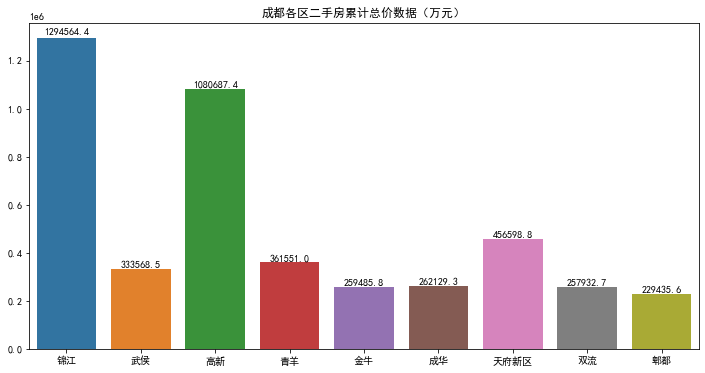

In [4]:
plt.figure(figsize=(12,6))
plt.title("成都各区二手房累计总价数据（万元）")
img = sns.barplot(x=regions, y=total_sum)
show_values(img)

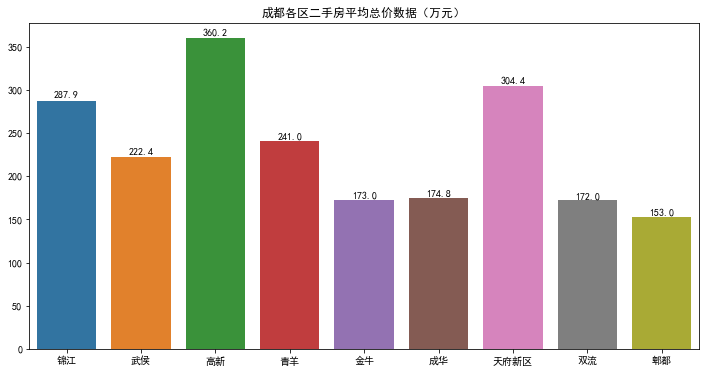

In [5]:
plt.figure(figsize=(12,6))
plt.title("成都各区二手房平均总价数据（万元）")
img = sns.barplot(x=regions, y=total_mean)
show_values(img)

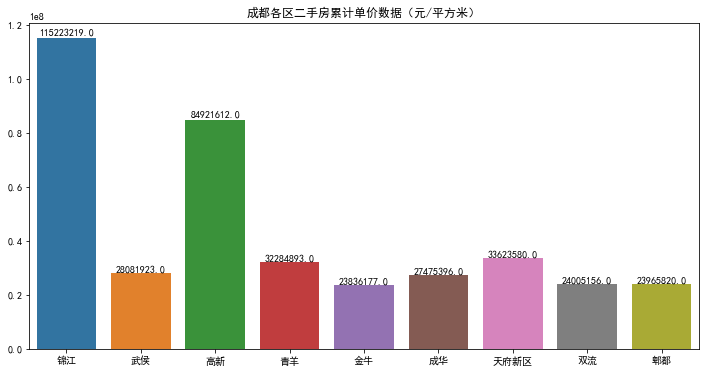

In [6]:
plt.figure(figsize=(12,6))
plt.title("成都各区二手房累计单价数据（元/平方米）")
img = sns.barplot(x=regions, y=unit_sum)
show_values(img)

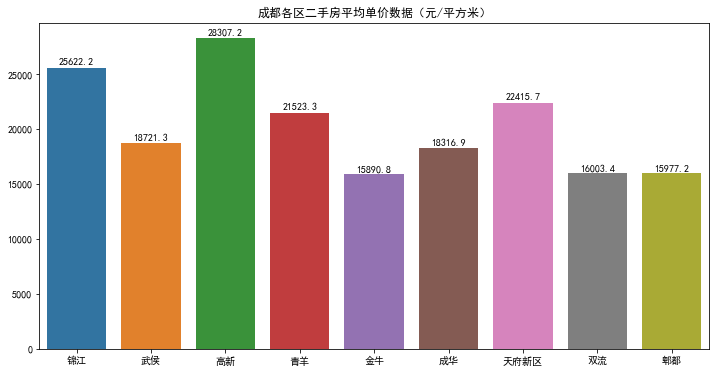

In [7]:
plt.figure(figsize=(12,6))
plt.title("成都各区二手房平均单价数据（元/平方米）")
img = sns.barplot(x=regions, y=unit_mean)
show_values(img)

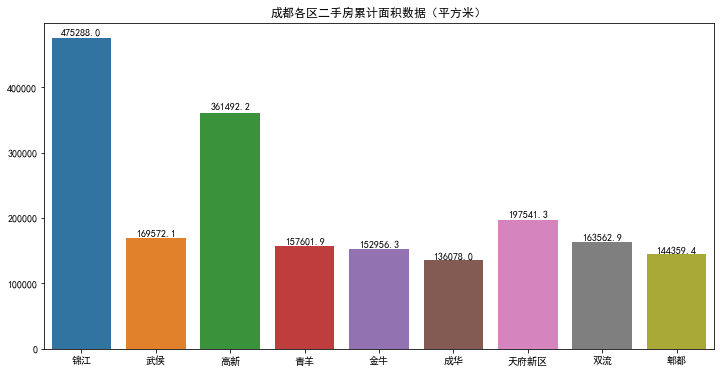

In [8]:
plt.figure(figsize=(12,6))
plt.title("成都各区二手房累计面积数据（平方米）")
img = sns.barplot(x=regions, y=area_sum)
show_values(img)

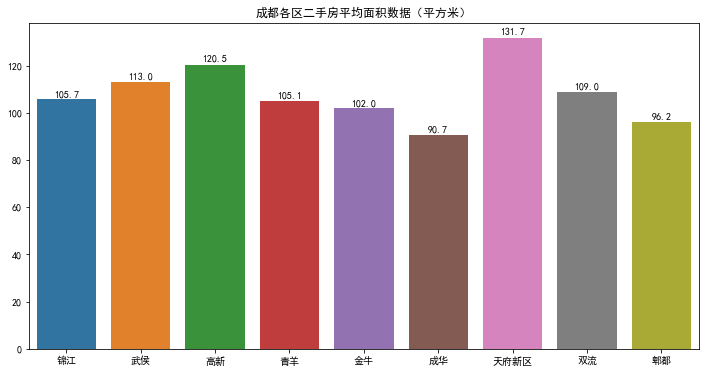

In [9]:
plt.figure(figsize=(12,6))
plt.title("成都各区二手房平均面积数据（平方米）")
img = sns.barplot(x=regions, y=area_mean)
show_values(img)

   index   区域
0    合江亭  769
1    三圣乡  766
2     南湖  649
3     大源  494
4    蛟龙港  409
5    航空港  392
6    卓锦城  382
7    外光华  352
8     中德  307
9     华府  306
10   盐市口  300
11    广都  294
12   九眼桥  287
13    麓山  277
14    华阳  268


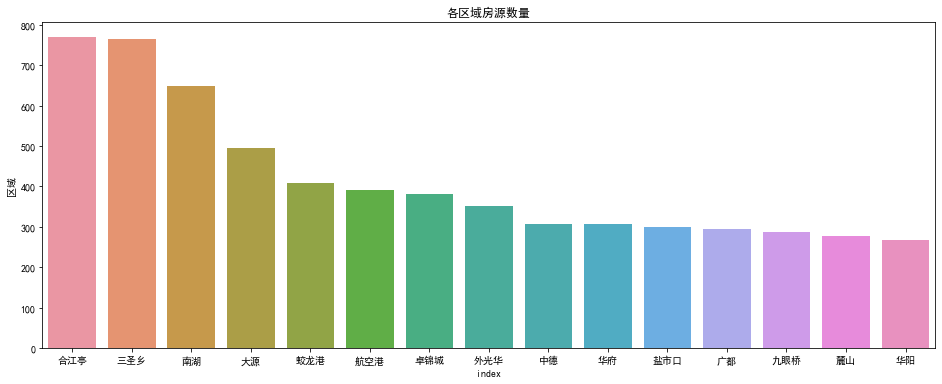

In [10]:
# 各区域房源数量
number = data['区域'].value_counts().reset_index().sort_values(by='区域',ascending=False).head(15)
print(number)
plt.figure(figsize=(16,6))
sns.barplot(x='index',y='区域',data=number)
plt.title('各区域房源数量')
plt.show()

       区域            单价
143    红光  10972.875000
144    西河  10794.142857
145  郫县城区  10747.883721
146  郫县万达  10552.857143
147    十陵   9879.500000
148    航天   9769.500000
149  新都城区   9474.551724
150   阳光城   9238.333333
151  河东新区   9203.916667
152    花源   8706.250000
153    五津   8676.800000
154  温江老城   7530.947368
155   青白江   7401.083333
156  国色天乡   7281.250000
157   都江堰   6894.727273
158    崇州   6688.000000
159    彭州   6491.500000
160    金堂   6152.107143
161  城北片区   5693.500000
162  城东片区   4361.000000


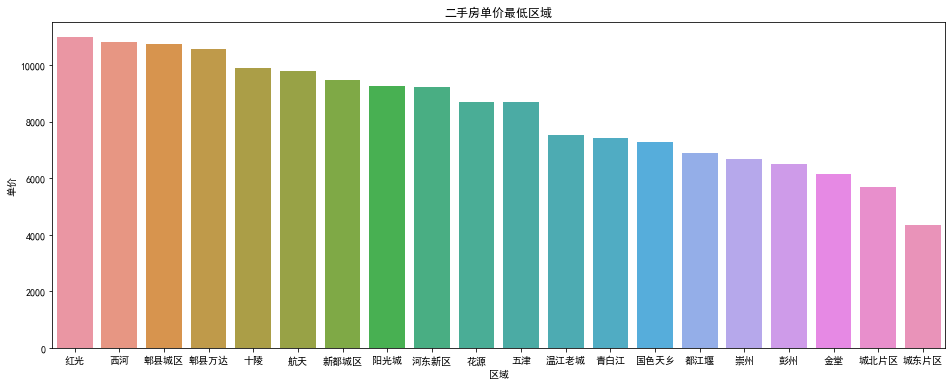

In [22]:
res = data.groupby(by=['区域'])['单价'].mean().sort_values(ascending = False).reset_index().tail(20)
print(res)

plt.figure(figsize=(16,6))
sns.barplot(x='区域',y='单价',data=res)
plt.title('二手房单价最低区域')
plt.show()

      区域            单价
2    茶店子  17973.375000
3    高家庄  17646.170000
4    驷马桥  17503.611111
5    天回镇  17345.176471
6    营门口  16443.649351
7    花牌坊  16049.462963
8    花照壁  15783.883721
9     金府  15149.262295
10   马鞍路  15102.728571
11   蜀汉路  15082.673469
12  金牛万达  14935.700535
13   五块石  14627.195876
14  一品天下  14266.192982
15   通惠门  14007.685714
16    沙湾  13188.704225
17  西南交大  12818.319149
18  抚琴小区  11950.500000
19  石人小区  11724.923077
20   九里堤  11256.444444
21  保利公园   9346.000000


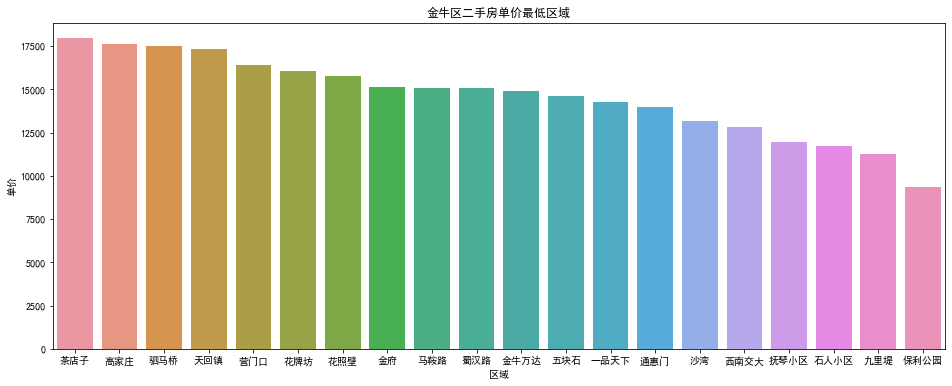

In [25]:
region_data = data[data['所属区'] == '金牛']
res = region_data.groupby(by=['区域'])['单价'].mean().sort_values(ascending = False).reset_index().tail(20)
print(res)

plt.figure(figsize=(16,6))
sns.barplot(x='区域',y='单价',data=res)
plt.title('金牛区二手房单价最低区域')
plt.show()

       区域            单价
0     金融城  48465.372093
1   麓湖生态城  45807.763636
2     东大路  40787.909953
3      大源  37960.362348
4    天府长城  34445.142857
5      东湖  33847.722944
6    城南宜家  32242.038760
7     攀成钢  31365.448980
8     卓锦城  30476.170157
9    市一医院  29961.400000
10    浣花溪  29573.722222
11    优品道  27852.209302
12   光华泡小  27630.512195
13    新会展  27020.614458
14     中德  26666.205212
15    合江亭  26579.849155
16   宽窄巷子  26573.127273
17    沙河堡  25794.132701
18     金沙  25770.737226
19    盐市口  25749.280000


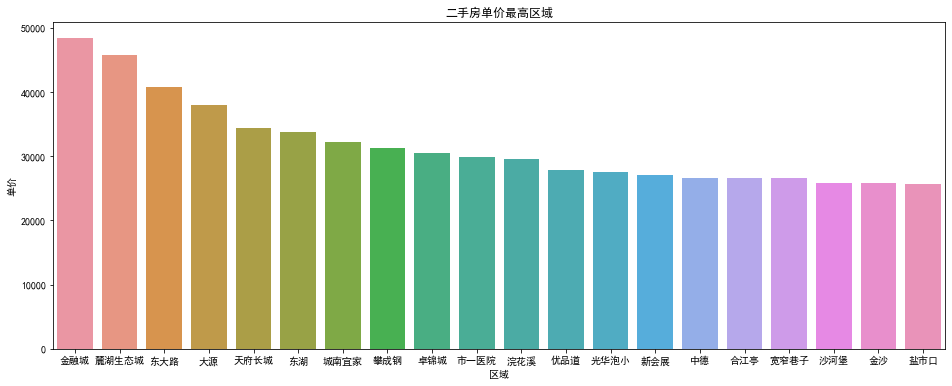

In [24]:
res = data.groupby(by=['区域'])['单价'].mean().sort_values(ascending = False).reset_index().head(20)
print(res)

plt.figure(figsize=(16,6))
sns.barplot(x='区域',y='单价',data=res)
plt.title('二手房单价最高区域')
plt.show()